---
# <span style="color: #5D3FD3">**חקירת דפוסי פשיעה בלוס אנג'לס **  </span>

## <span style="color: #5D3FD3">**מס קבוצה 5 **  </span>

###  שמות הסטודנטים:
אורי חזן <br>
שיריה אליאסי <br>
גיל טויטו <br>

From:
Link to Kaggle: https://www.kaggle.com/datasets/haseefalam/crime-dataset/data <br>
Kaggle sources: נחדגבךדלצבלחדמםבל 

---

<img src="תמונה פתיחת פרוייקט.png" alt="Project Image" width="600">

<a id='section0'></a>
## <span style="color: #5D3FD3">Table of Contents:  </span>

1.  Getting to know+clearing the data
2.  First path
3.  Second path
4.  Third path
5.  Summary


נצטרך לכתוב פה את שלנו 

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

---
[back to menu](#section0)

# <span style="color: #BDB5D5">  Getting to know the data: </span>


 <div dir='rtl'>

- הבנת העמודות והנתונים
- הצגת אחוז חולים בריאים
- הצגת הקורולציה 
 <div dir='rtl'>
מכיוון שראינו שאין גורם ישיר ובולט למקרה, התחלנו לחקור לעומק את העמודות ולהצליב מידע בינהן
     
---

 הערה: 
 להראות קודם כל שייפ של הדאטה ועמודות של הדאטה המקורית לפני סינון 


אפשר גם להציג את   לפני סינון .isnull().sum()
ואז לעשות את הקוד של הסינון
ולהציג את האחריי



לנסות למצוא דרך שכל הקודים של הסינון יהיו או בתא אחד או יותר קצרים 
כי יש לנו הרבה קוד לפני ההצגה הראשונה בכלל 






In [2]:
paths=['https://raw.githubusercontent.com/oree334/DataAnalysisAcademicProject/refs/heads/master/part3_2.csv',
'https://raw.githubusercontent.com/oree334/DataAnalysisAcademicProject/refs/heads/master/part3_3.csv']

In [3]:
df = pd.DataFrame()

for path in paths:
    try:
        # Read the CSV file into a DataFrame
        data = pd.read_csv(path)
        # Concatenate the new DataFrame with the main one
        df = pd.concat([df, data], axis=0)  # Use axis=0 to stack rows
    except Exception as e:
        print(f"Error reading {path}: {e}")

In [4]:
columns_to_drop = ['LON', 'LAT', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Rpt Dist No', 'Part 1-2', 'Crm Cd','Premis cd','Cross Street','Weapon Used Cd']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
New_df=df
New_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Desc,Status,Status Desc,LOCATION
0,232010446,05/19/2023 12:00:00 AM,05/19/2023 12:00:00 AM,1055,20,Olympic,THEFT PLAIN - PETTY ($950 & UNDER),1822 0344,0,X,X,406.0,OTHER STORE,NaN,IC,Invest Cont,600 S VIRGIL AV
1,231209550,04/03/2023 12:00:00 AM,04/02/2023 12:00:00 AM,130,12,77th Street,THEFT OF IDENTITY,0100 0922,62,M,B,501.0,SINGLE FAMILY DWELLING,NaN,IC,Invest Cont,200 E 76TH ST
2,231807171,03/04/2023 12:00:00 AM,03/04/2023 12:00:00 AM,430,18,Southeast,INTIMATE PARTNER - AGGRAVATED ASSAULT,2000 0913 1814 0416 0419 0410,29,F,H,501.0,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,700 E 90TH ST
3,230612904,07/23/2023 12:00:00 AM,07/23/2023 12:00:00 AM,600,6,Hollywood,DISTURBING THE PEACE,0904 1822 1501,27,F,W,102.0,SIDEWALK,NaN,IC,Invest Cont,6200 HOLLYWOOD BL
4,231107274,03/29/2023 12:00:00 AM,03/29/2023 12:00:00 AM,1900,11,Northeast,VEHICLE - STOLEN,NaN,0,NaN,NaN,108.0,PARKING LOT,NaN,IC,Invest Cont,4600 RUSSELL AV


In [5]:
df.describe()


,DR_NO,TIME OCC,AREA,Vict Age,Premis Cd
count,1.592230e+05,159223.000000,159223.000000,159223.000000,159223.000000
mean,2.313186e+08,1341.992363,10.649554,28.788002,312.120221
std,1.760038e+06,648.980272,6.130465,22.200607,218.863241
min,2.315000e+03,1.000000,1.000000,-1.000000,101.000000
25%,2.306042e+08,900.000000,5.000000,0.000000,101.000000
50%,2.311131e+08,1423.000000,11.000000,30.000000,210.000000
75%,2.316120e+08,1900.000000,16.000000,44.000000,501.000000
max,2.421097e+08,2359.000000,21.000000,99.000000,976.000000


In [6]:
time_field = 'Date Rptd' #time when the crime reported

df[time_field] = df[time_field].apply(lambda x: x.split()[0])
df['Year'] = df[time_field].apply(lambda x: int(x.split('/')[-1]))
df['Month'] = df[time_field].apply(lambda x: int(x.split('/')[0]))
df['Day'] = df[time_field].apply(lambda x: int(x.split('/')[1]))
df['Hour'] = df['TIME OCC'].apply(lambda x: x//100)

def GetAgeCategory(age):
    if age<=4: return 'Baby'
    if age<=12: return 'Child'
    elif age<=19: return 'Teen'
    elif age<=39: return 'Adult'
    elif age<=59: return 'Middle'
    else: return 'Senior'

df['Vict Age Cat'] = df['Vict Age'].apply(lambda x: GetAgeCategory(x))
df.drop(df[(df['Year']==2023) & (df['Month']==6)].index, inplace=True)
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,...,Premis Desc,Weapon Desc,Status,Status Desc,LOCATION,Year,Month,Day,Hour,Vict Age Cat
1,231209550,04/03/2023,04/02/2023 12:00:00 AM,130,12,77th Street,THEFT OF IDENTITY,0100 0922,62,M,...,SINGLE FAMILY DWELLING,NaN,IC,Invest Cont,200 E 76TH ST,2023,4,3,1,Senior
2,231807171,03/04/2023,03/04/2023 12:00:00 AM,430,18,Southeast,INTIMATE PARTNER - AGGRAVATED ASSAULT,2000 0913 1814 0416 0419 0410,29,F,...,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,700 E 90TH ST,2023,3,4,4,Adult
3,230612904,07/23/2023,07/23/2023 12:00:00 AM,600,6,Hollywood,DISTURBING THE PEACE,0904 1822 1501,27,F,...,SIDEWALK,NaN,IC,Invest Cont,6200 HOLLYWOOD BL,2023,7,23,6,Adult
4,231107274,03/29/2023,03/29/2023 12:00:00 AM,1900,11,Northeast,VEHICLE - STOLEN,NaN,0,NaN,...,PARKING LOT,NaN,IC,Invest Cont,4600 RUSSELL AV,2023,3,29,19,Baby
5,230600605,03/23/2023,03/23/2023 12:00:00 AM,730,6,Hollywood,TRESPASSING,1402 1501 2002 0319,0,X,...,SHOPPING MALL (COMMON AREA),NaN,IC,Invest Cont,6800 HOLLYWOOD BL,2023,3,23,7,Baby
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79605,231224752,12/11/2023,12/11/2023 12:00:00 AM,2100,12,77th Street,BURGLARY,1822 0344,50,M,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,IC,Invest Cont,200 W 74TH ST,2023,12,11,21,Middle
79606,232106883,03/18/2023,03/18/2023 12:00:00 AM,100,21,Topanga,INTIMATE PARTNER - SIMPLE ASSAULT,2000 0400 1813,49,F,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,21800 ROSCOE BL,2023,3,18,1,Middle
79607,231112796,08/29/2023,08/26/2023 12:00:00 AM,110,11,Northeast,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0344,26,M,...,OTHER PREMISE,NaN,IC,Invest Cont,3200 ROWENA AV,2023,8,29,1,Adult
79609,230405229,02/06/2023,02/01/2023 12:00:00 AM,108,4,Hollenbeck,THEFT OF IDENTITY,0100,78,F,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,IC,Invest Cont,5300 VIA MARISOL,2023,2,6,1,Senior


<h1>ניתוח בסיסי ראשוני</h1>

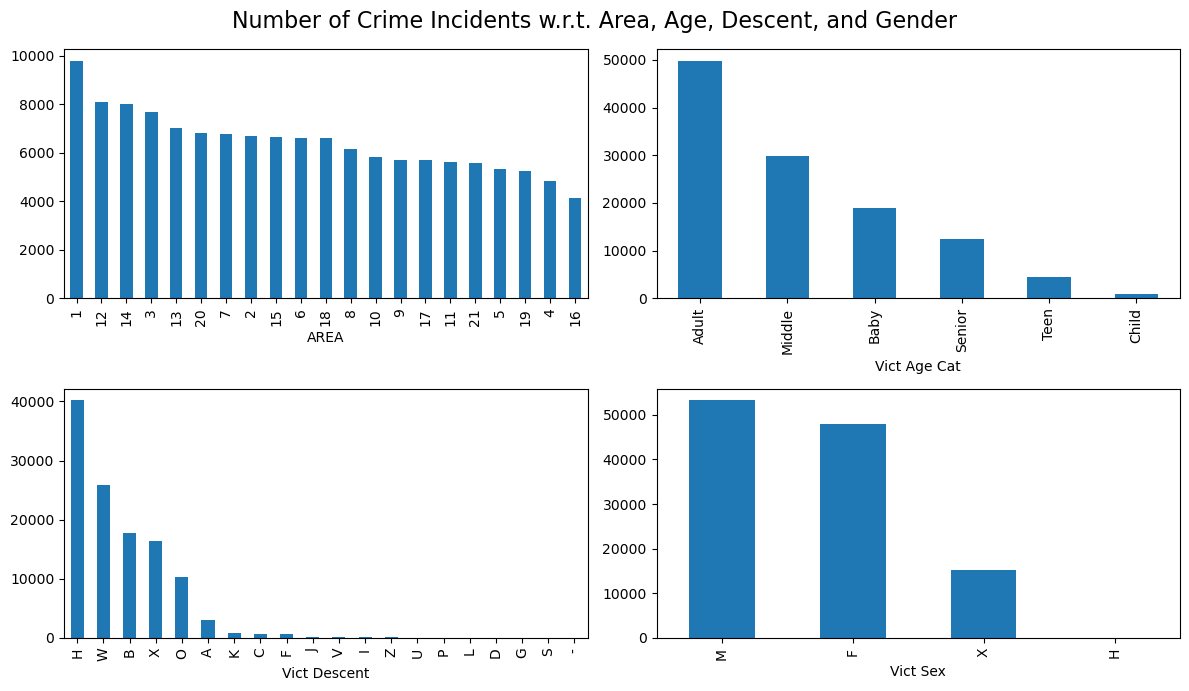

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))

df.groupby(['AREA'])['Day'].count().sort_values(ascending=False).plot(kind='bar', ax=axes[0,0])
df[df['Vict Descent'].notnull()].groupby(['Vict Age Cat'])['Day'].count().sort_values(ascending=False).plot(kind='bar', ax=axes[0,1])
df.groupby(['Vict Descent'])['Day'].count().sort_values(ascending=False).plot(kind='bar', ax=axes[1,0])
df.groupby(['Vict Sex'])['Day'].count().sort_values(ascending=False).plot(kind='bar', ax=axes[1,1])
fig.suptitle('Number of Crime Incidents w.r.t. Area, Age, Descent, and Gender', fontsize=16)
plt.tight_layout()

הערה:

נראלי שכדאי להציג פה את הקורולציה בין העמודות עם מפת חום ולהראות שאין קשרים חזקים
ולכן החלטנו לנתח בצורות האחרות...

להראות גם המסה של הטבלה 

לנסות לעשות get dammis 
מה יצא לנו אחריי זה?

צריך לבדור בגיפיטי יש אופציה לעשות קורולציה עם גט דאממיז מול עמודה שבוחרים מהדאטה
אולי נצליח למצוא קורולציה מהנתונים ככה

אפשר גם לנסות למצוא קורולציה בין מס קוד של הפשע הכי נפוץ לגיל אולי או קבוצה אתנית 
סתם מעלה רעיון שאפשר להשתמש בקודים האלה


אפשר גם לנסות לבדוק לגביי הקוד פשע אם יש יותר מפשע אחד שהאדם הואשם בו אז אם יש קורולציה בין סוגי הפשעים לבין זה שיש יותר מפשע אחד
ואז לקחת בעצם רק את העמודה הזאת ולבדוק אותה 



ואז נתחיל לעסוק בחלקים עצמם של הניתוחים:

ניגש לניתוח הראשון לפי גילאים ונעמיק בו יותר 
איך אפשר להעמיק בו?
1- הגיל הנפוץ ביותר 
2- איזה פשעים נפוצים יותר לגילאים מסויימים 
3- באיזה חלק ביום נפגות קבוצות גיל מסויימות 
אפשר לחלק את הגילאים כמו שההוא שהעלה לקאגל חילק ואז נראה מגמה רחבה יותר




הניתוח השני שלנו יהיה על קבוצות אתניות 
אני רוצה שנעשה את הגרף נקודות שהן עשו ולפי זה נבחר להתעסק בקבוצות האתניות העיקריות
מה מעניין אותנו לבדוק על קבוצות אתניות? 
איזה קבוצה נפגעת הכי הרבה
פילוח הקורבנות לפי מוצא אתני וסוג הפשע.
באיזה אזור יש סכנה מרובה לקבוצה הזאת 
פשעים שמכוונים נגד קבוצות מסוימות (למשל פשעי שנאה).


בכל אחד מהניתוחים האלה אפשר להוסיף ניתוח לפי מיקום ולכן אני לא חושבת שיש צורךצלעשות גם ניתוח לפי מיקום בפני עצמו
או שאפשר גם עדיין לעשות ולוותר על ניתוח לפי זמן


ניתוח שלישי יהיה ניתוח לפי זמן \ שנים
להראות את העליה במספר הפשעים לאורך השנים
סוג הפשעים לפי עונות השנה? ,מעלה הצעה
כאילו בסגנון של רכוש נגנב יותר בקיץ
או לפי שעות - פשעים אלימים נפוצים בלילה?
ניתוח לפי שעות ביום 
סוגי פשיעה נפוצים לאורך השנים- למרות שכבר כנראה ניגע בזה לפני
צריך למצוא מה עוד יכול לעניין אותנו בקשר לניתוח לפי זמן 




ובסוף נצטרך לעשות סיכום של המסקנות שהגענו אליהם עד עכשיו 

### חלק ראשון - ניתוח לפי גילאים
נכתוב פה פסקה קצרה של הסבר של מה ניתחנו


איך אפשר להעמיק בו?
1- הגיל הנפוץ ביותר 
2- איזה פשעים נפוצים יותר לגילאים מסויימים 
3- באיזה חלק ביום נפגות קבוצות גיל מסויימות 
אפשר לחלק את הגילאים כמו שההוא שהעלה לקאגל חילק ואז נראה מגמה רחבה יותר



Text(0.5, 1.0, 'Number of Crime Incidents over Victim Ages')

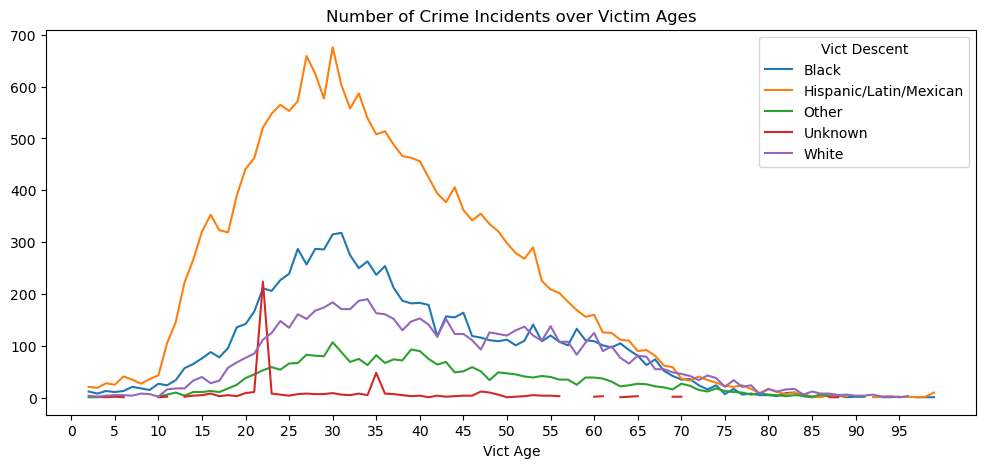

In [15]:
top5descents = df.groupby(['Vict Descent'])['Day'].count().sort_values(ascending=False).index[:5]
data = df[(df['Vict Age']>0) & (df['Vict Descent'].isin(top5descents))].copy()
vddict = {'B':'Black', 'H':'Hispanic/Latin/Mexican', 'O':'Other', 'W':'White', 'X':'Unknown'}
data['Vict Descent'] = data['Vict Descent'].apply(lambda x: vddict[x])

plt_data = data.groupby(['Vict Age', 'Vict Descent'])['Day'].count().unstack()
plt_data.plot(kind='line', figsize=(12, 5), xticks=range(0, 100, 5))
plt.title('Number of Crime Incidents over Victim Ages')

As for the numbers of different genders over ages, two observations:

There is a separating line at age 35. Below this age, the number of crime incidents against female is higher than that of male.
There are two exceptional peaks for male: age 35 and 50.
There is a gender code 'H' (82 crime incidents), which is not mentioned in the official website.

לגבי המספרים של מגדרים שונים לפי גילאים, ניתן להסיק שתי תובנות:

יש קו מפריד בגיל 35. מתחת לגיל זה, מספר מקרי הפשיעה כנגד נשים גבוה יותר מזה של גברים.
יש שתי פסגות חריגות לגברים: בגיל 35 ובגיל 50.
קוד מגדר 'H' (82 מקרי פשיעה) אינו מוזכר באתר הרשמי.






הערה:

לא הבנתי מה זה נותן לנו?

ומהם שני הניתוחים הבאים?


נראלי שכדאי להיצמד לאופציות של הניתוחים שכתבתי למעלה


Text(0.5, 1.0, 'Number of Crime Incidents over Victim Ages')

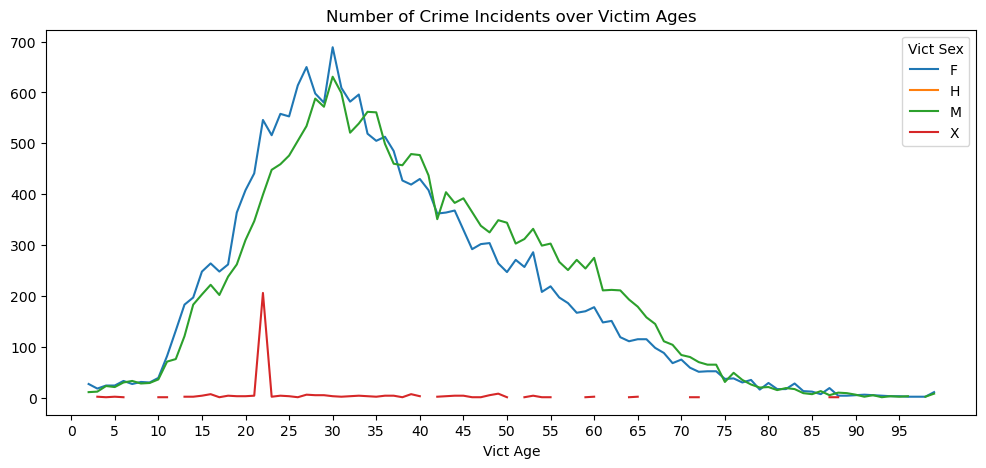

In [16]:
data = df[(df['Vict Age']>0)]
plt_data = data.groupby(['Vict Age', 'Vict Sex'])['Day'].count().unstack()
plt_data.plot(kind='line', figsize=(12, 5), xticks=range(0, 100, 5))
plt.title('Number of Crime Incidents over Victim Ages')

Text(0.5, 1.0, 'Number of Crime Incidents over Victim Ages')

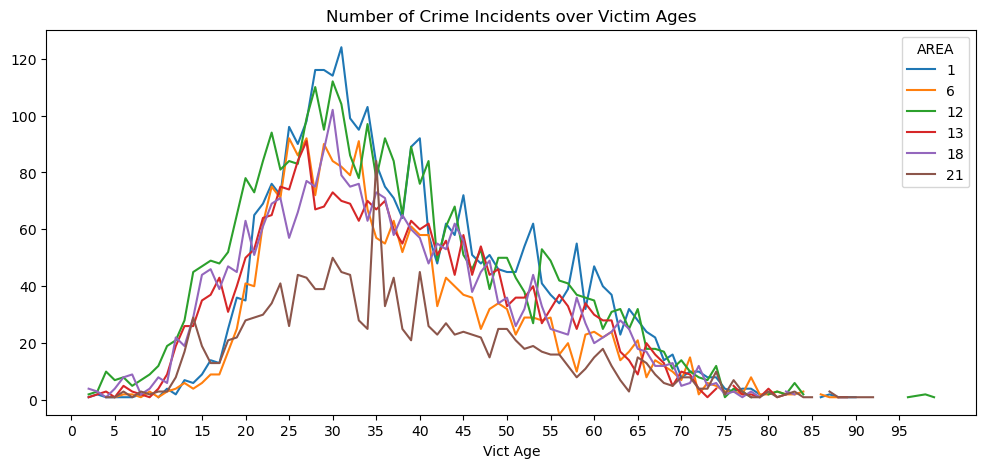

In [17]:
top5areas = list(df.groupby(['AREA'])['Day'].count().sort_values(ascending=False).index[:5])
data = df[(df['Vict Age']>0) & (df['AREA'].isin(top5areas+[21]))]

plt_data = data.groupby(['Vict Age', 'AREA'])['Day'].count().unstack()
plt_data.plot(kind='line', figsize=(12, 5), xticks=range(0, 100, 5))
plt.title('Number of Crime Incidents over Victim Ages')

<h1>ניתוח לפי שנים בצבעים</h1>

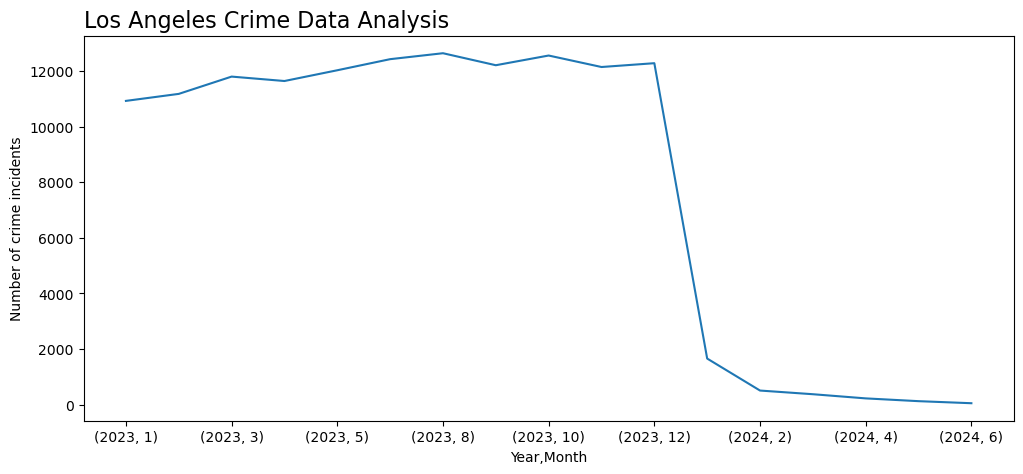

In [8]:
df.groupby(['Year', 'Month'])['Day'].count().plot(kind='line', figsize=(12, 5))
plt.ylabel('Number of crime incidents')
plt.title('Los Angeles Crime Data Analysis', loc='left', fontsize=16)
plt.show()

<h1>ניתוח לפי שנים בצבעים</h1>

<Axes: title={'center': 'Number of Crime Incidents over 12 Months'}, xlabel='Month'>

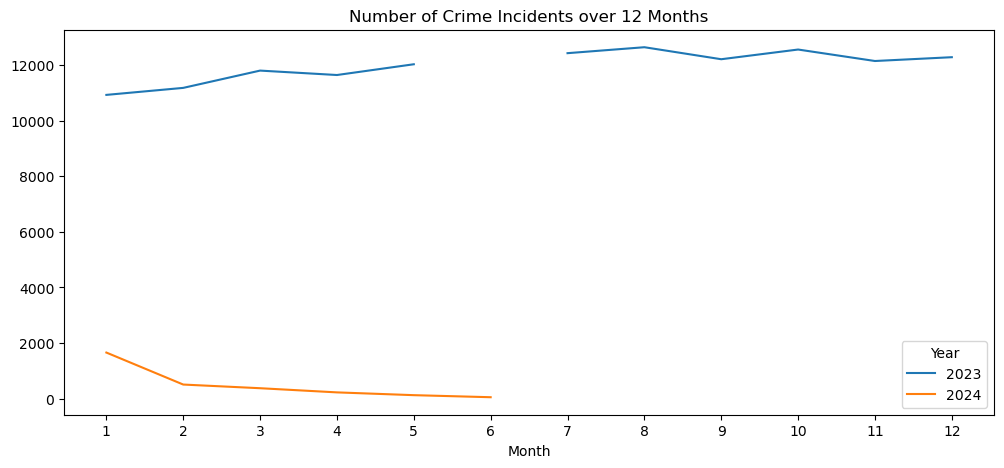

In [9]:
pltdata = df.groupby(['Month', 'Year'])['Day'].count().unstack()
pltdata.plot(kind='line', figsize=(12, 5), xticks=range(1, 13), title='Number of Crime Incidents over 12 Months')

In [13]:
df.isnull()


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,...,Premis Desc,Weapon Desc,Status,Status Desc,LOCATION,Year,Month,Day,Hour,Vict Age Cat
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,True,...,False,True,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79605,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
79606,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
79607,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
79609,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [14]:
df = df.dropna()
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,...,Premis Desc,Weapon Desc,Status,Status Desc,LOCATION,Year,Month,Day,Hour,Vict Age Cat
2,231807171,03/04/2023,03/04/2023 12:00:00 AM,430,18,Southeast,INTIMATE PARTNER - AGGRAVATED ASSAULT,2000 0913 1814 0416 0419 0410,29,F,...,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,700 E 90TH ST,2023,3,4,4,Adult
15,231012898,08/25/2023,08/25/2023 12:00:00 AM,120,10,West Valley,INTIMATE PARTNER - SIMPLE ASSAULT,2000 0913 1813 0400 0444 0319 2002 1414,50,F,...,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,17400 KESWICK ST,2023,8,25,1,Middle
26,230505815,02/18/2023,02/18/2023 12:00:00 AM,2112,5,Harbor,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 0432 1309 1822,43,M,...,SIDEWALK,PIPE/METAL PIPE,IC,Invest Cont,200 N PACIFIC AV,2023,2,18,21,Middle
27,230814942,09/27/2023,09/27/2023 12:00:00 AM,30,8,West LA,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0913 0334 0445 1810,20,M,...,SINGLE FAMILY DWELLING,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,800 HILGARD AV,2023,9,27,0,Adult
30,232013484,07/30/2023,07/30/2023 12:00:00 AM,1855,20,Olympic,BATTERY - SIMPLE ASSAULT,0361 0444 0913,32,F,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,500 S KENMORE AV,2023,7,30,18,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79599,230913623,08/31/2023,08/31/2023 12:00:00 AM,1645,9,Van Nuys,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1822 0334 0445 1420 1414 2004 0421,38,F,...,GAS STATION,SCREWDRIVER,AA,Adult Arrest,SHERMAN WY,2023,8,31,16,Adult
79601,231209503,04/03/2023,04/02/2023 12:00:00 AM,2300,12,77th Street,ROBBERY,1822 0344 0334 0400 0416 0355 0342,52,M,...,SIDEWALK,FOLDING KNIFE,IC,Invest Cont,8300 S BROADWAY,2023,4,3,23,Middle
79604,230708271,04/10/2023,04/09/2023 12:00:00 AM,2327,7,Wilshire,BATTERY - SIMPLE ASSAULT,1822 0448 1300 1309 0400 0416,32,M,...,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,1200 WEST BL,2023,4,10,23,Adult
79606,232106883,03/18/2023,03/18/2023 12:00:00 AM,100,21,Topanga,INTIMATE PARTNER - SIMPLE ASSAULT,2000 0400 1813,49,F,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,21800 ROSCOE BL,2023,3,18,1,Middle
